# Prepare the dataset and EDA

## combine the datasets

In [28]:

from prepare_data_and_feature import run_1
from prepare_data_and_feature import get_feature_from_body

df_features  = run_1()

D:\GITHUB\SpamEmailClassifier\code\web\analysis\prepare_data_and_feature.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("", inplace=True)


2576
   Unnamed: 0                       date                     sender  \
0           0  2001-07-12 04:36:58-07:00   david.delainey@enron.com   
1           1  2001-07-06 13:45:05-07:00  richard.shapiro@enron.com   
2           2  2001-07-06 13:44:33-07:00  richard.shapiro@enron.com   
3           3  2001-07-31 15:31:57-07:00  robert.johnston@enron.com   
4           4  2001-07-27 04:32:47-07:00  robert.johnston@enron.com   

                recipient1                                      subject  \
0      john.greg@enron.com                             More UC/CSU Info   
1  john.lavorato@enron.com  Davis & Company -- incompetence personified   
2  john.lavorato@enron.com                    Link to DWR contract info   
3   greg.whalley@enron.com                              California 7/31   
4   greg.whalley@enron.com            FW: California Update 7/26/01 p.3   

                                                text  
0  ['', '', '---------------------- Forwarded by ...  
1  ['',

## Extracting meaningful features

In [29]:
df_features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5152 entries, 0 to 5151
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   subject                   5096 non-null   object 
 1   body                      5152 non-null   object 
 2   label                     5152 non-null   int64  
 3   non_latin_count           5152 non-null   float64
 4   non_latin_distinct_count  5152 non-null   float64
 5   emoji_count               5152 non-null   float64
 6   emoji_distinct_count      5152 non-null   float64
 7   spam_word_count           5152 non-null   float64
 8   spam_word_ratio           5152 non-null   float64
 9   has_spam_word             5152 non-null   float64
 10  has_link                  5152 non-null   float64
 11  has_email                 5152 non-null   float64
 12  has_number                5152 non-null   float64
 13  has_dollar                5152 non-null   float64
 14  has_emoj

## EDA

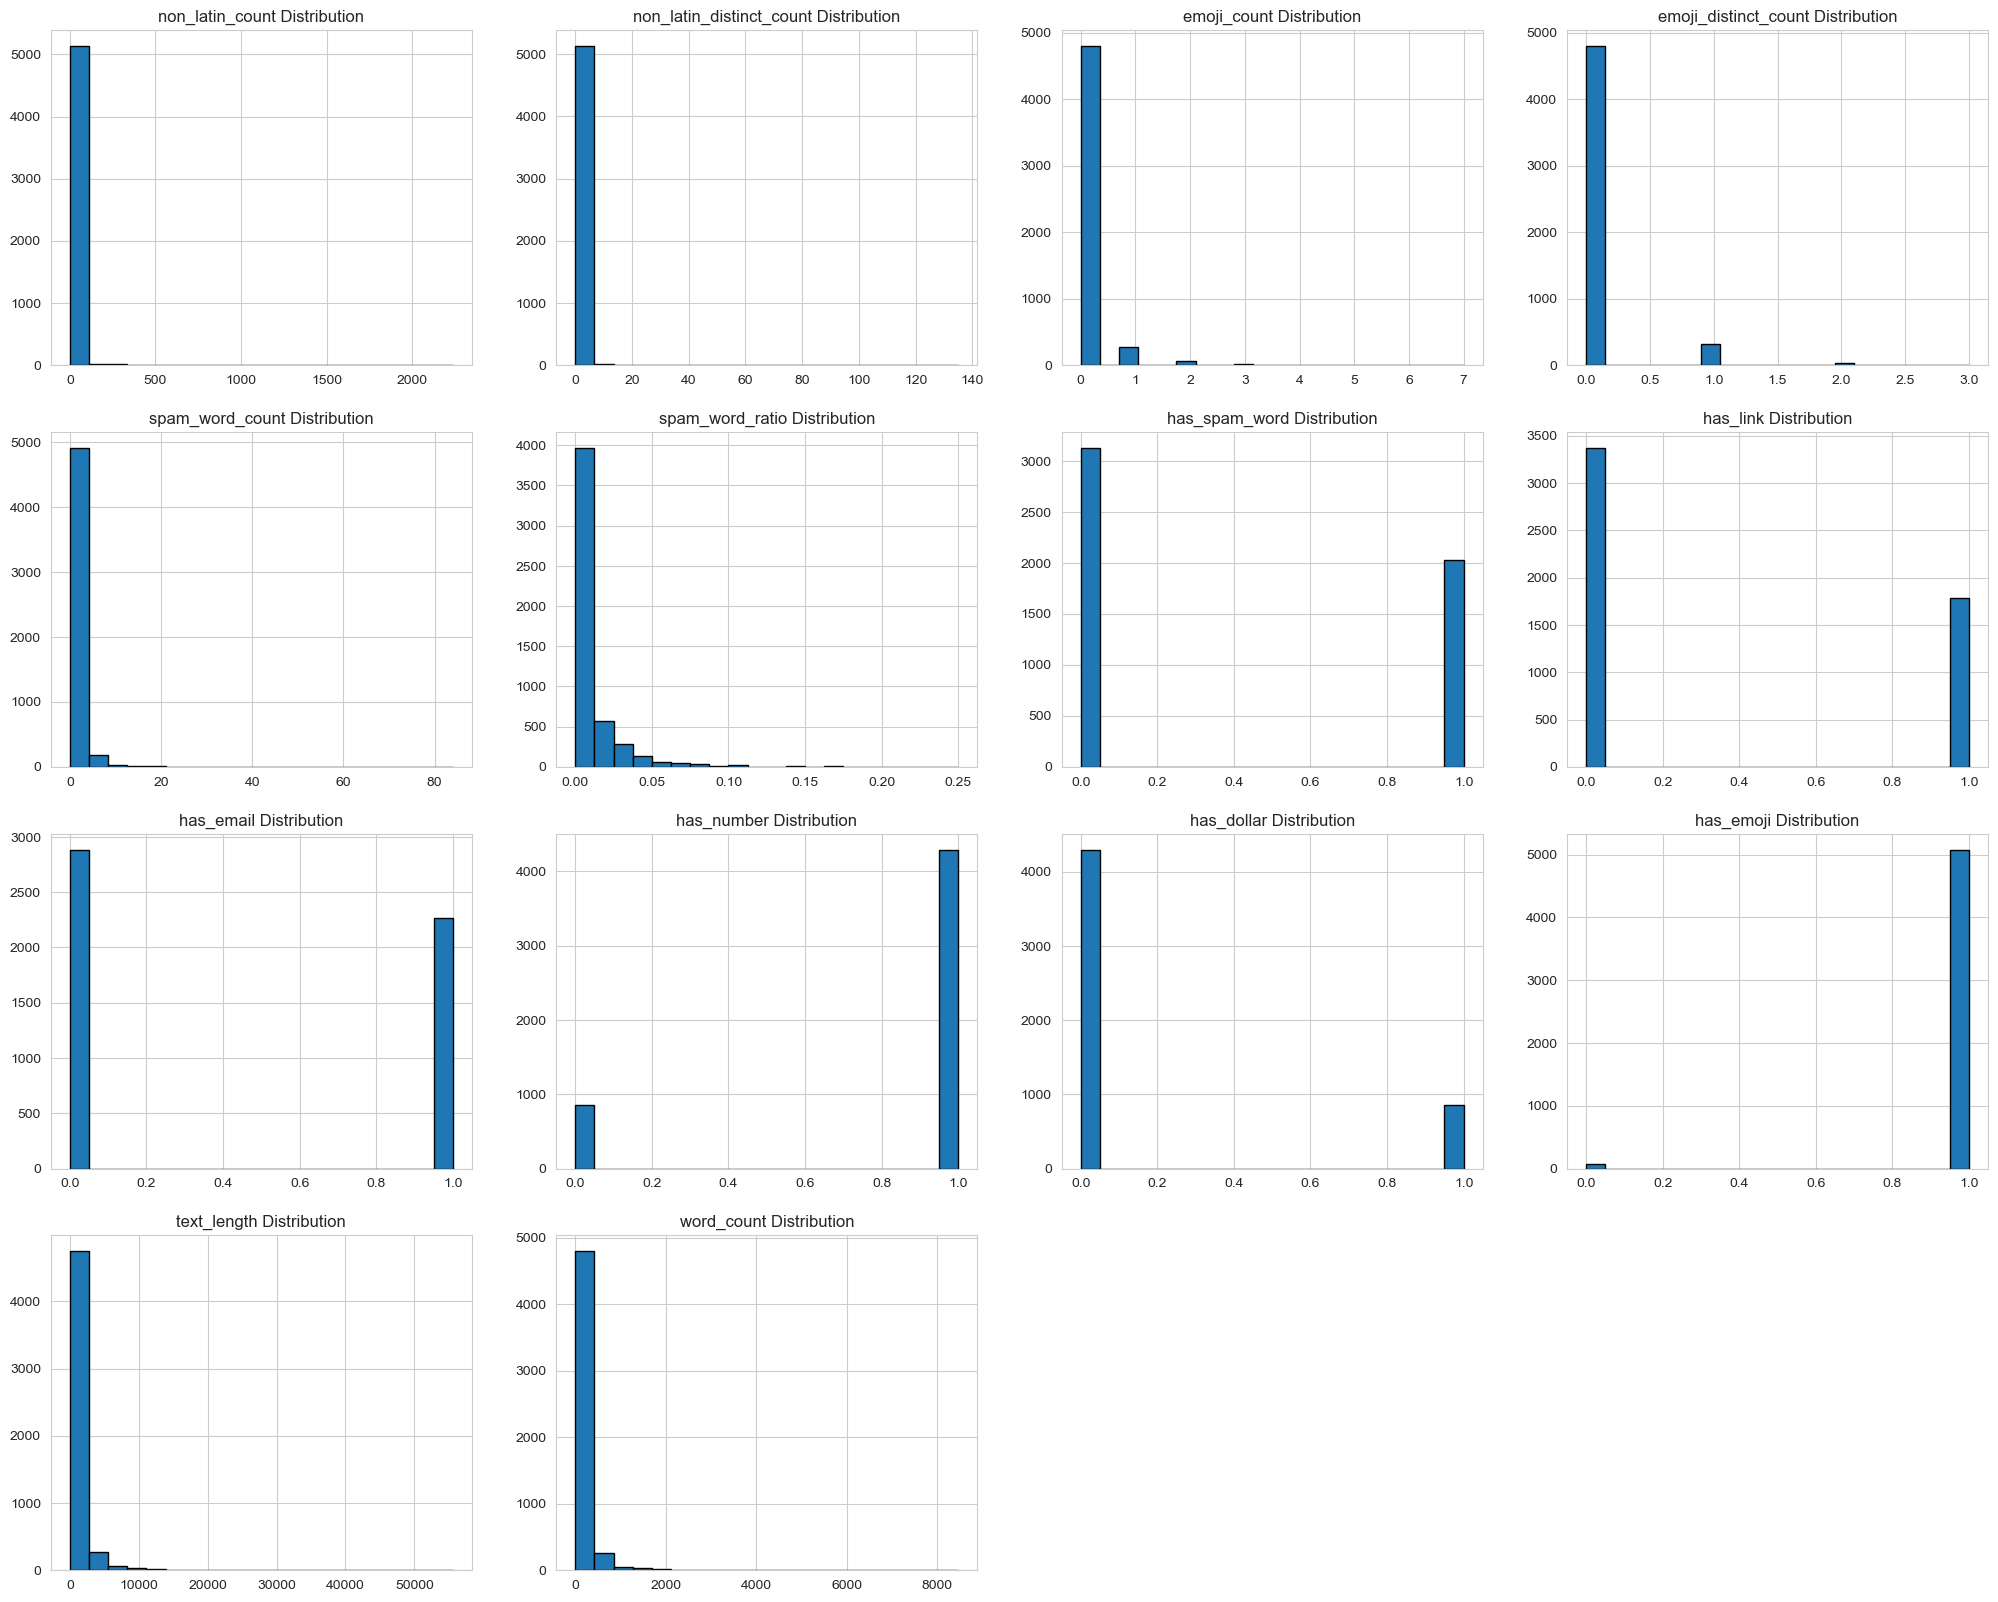

In [30]:

import matplotlib.pyplot as plt
import seaborn as sns

features = df_features.columns.tolist()[3:]

plt.figure(figsize=(25, 20))
for i, feature in enumerate(features):
    plt.subplot(4,4,i+1)
    plt.hist(df_features[feature], bins=20, edgecolor='k')
    plt.title(f"{feature} Distribution")


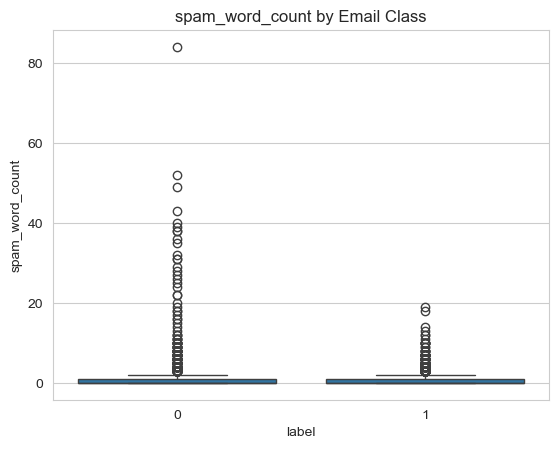

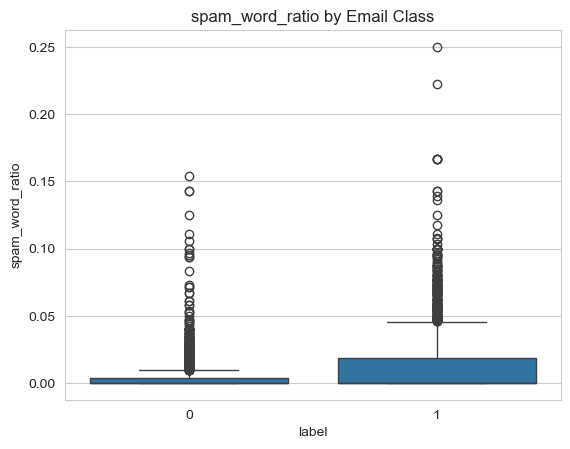

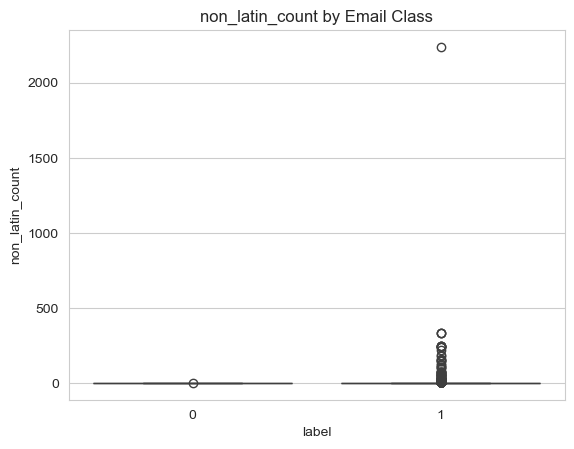

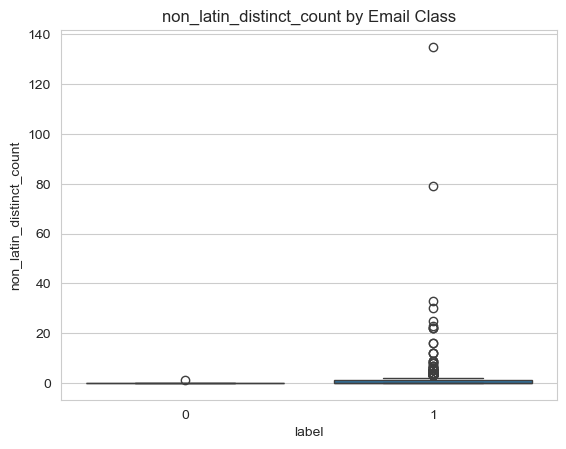

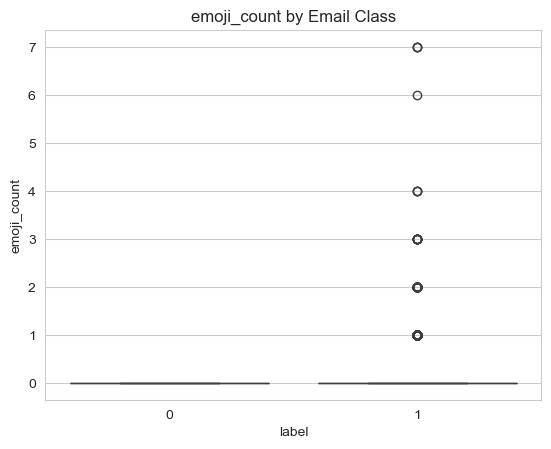

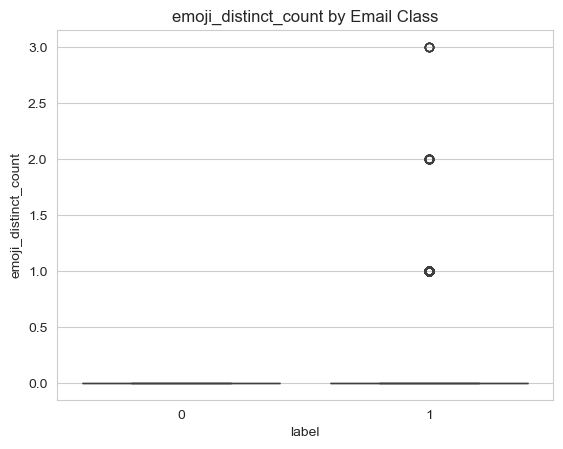

In [31]:
numeric_features = ['spam_word_count', 'spam_word_ratio',"non_latin_count","non_latin_distinct_count","emoji_count","emoji_distinct_count"]

for feature in numeric_features:
    sns.boxplot(x='label', y=feature, data=df_features)
    plt.title(f"{feature} by Email Class")
    plt.show()


In [32]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5152 entries, 0 to 5151
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   subject                   5096 non-null   object 
 1   body                      5152 non-null   object 
 2   label                     5152 non-null   int64  
 3   non_latin_count           5152 non-null   float64
 4   non_latin_distinct_count  5152 non-null   float64
 5   emoji_count               5152 non-null   float64
 6   emoji_distinct_count      5152 non-null   float64
 7   spam_word_count           5152 non-null   float64
 8   spam_word_ratio           5152 non-null   float64
 9   has_spam_word             5152 non-null   float64
 10  has_link                  5152 non-null   float64
 11  has_email                 5152 non-null   float64
 12  has_number                5152 non-null   float64
 13  has_dollar                5152 non-null   float64
 14  has_emoj

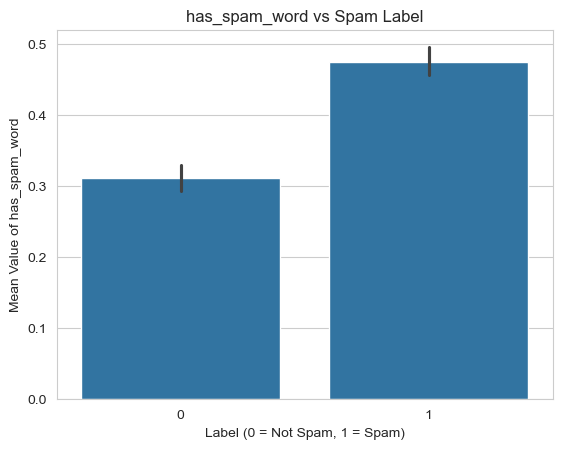

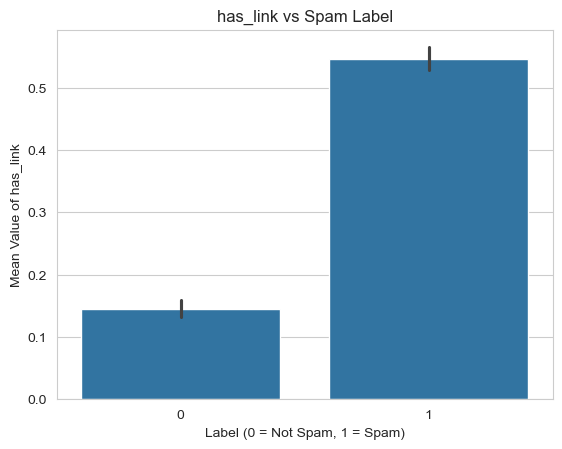

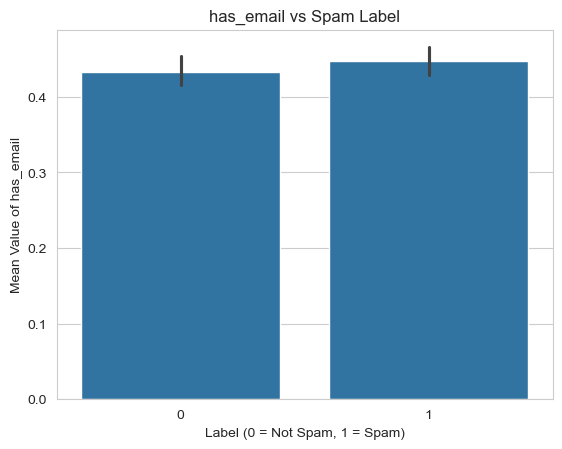

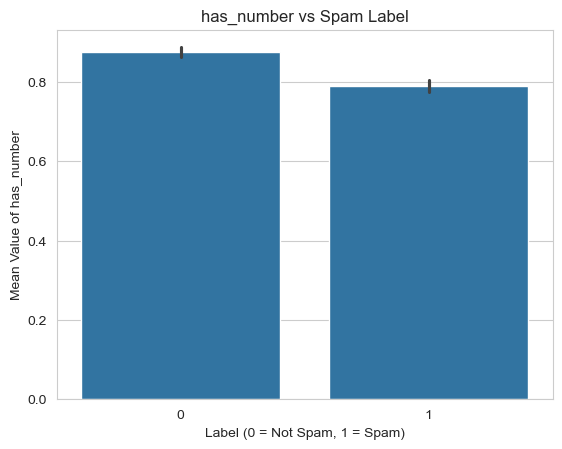

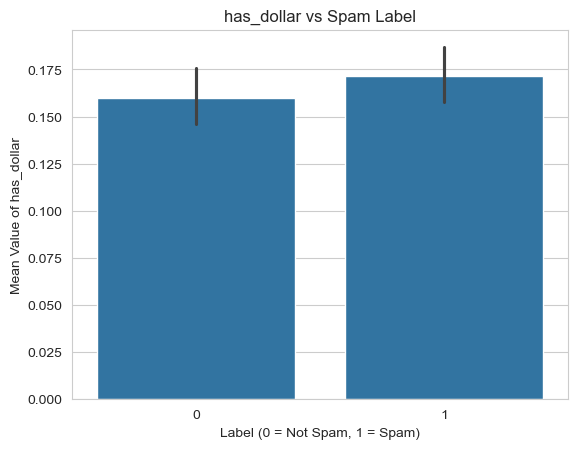

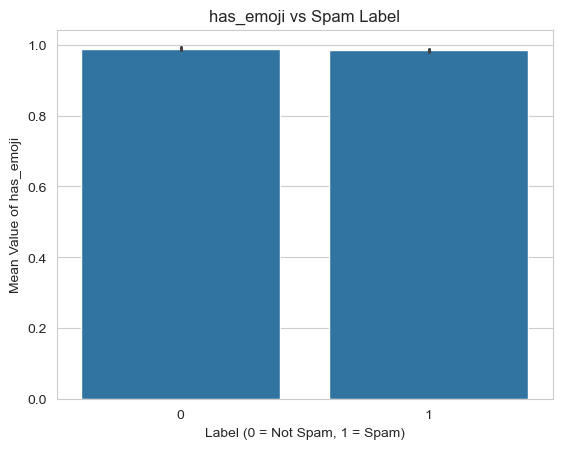

In [33]:
binary_features = ['has_spam_word', 'has_link', 'has_email', 'has_number', 'has_dollar', 'has_emoji']

for feature in binary_features:
    sns.barplot(x='label', y=feature, data=df_features)
    plt.title(f"{feature} vs Spam Label")
    plt.ylabel(f"Mean Value of {feature}")
    plt.xlabel("Label (0 = Not Spam, 1 = Spam)")
    plt.show()


# Model and training

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#
feature_cols = [col for col in df_features.columns if col not in ['subject', 'body', 'label']]

X = df_features[feature_cols]
y = df_features['label']

#
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.80      0.82       513
           1       0.81      0.86      0.83       518

    accuracy                           0.83      1031
   macro avg       0.83      0.83      0.83      1031
weighted avg       0.83      0.83      0.83      1031



In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

y_proba = model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8283
Precision: 0.8128
Recall: 0.8552
F1-score: 0.8335
ROC AUC: 0.8986
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       513
           1       0.81      0.86      0.83       518

    accuracy                           0.83      1031
   macro avg       0.83      0.83      0.83      1031
weighted avg       0.83      0.83      0.83      1031

[[411 102]
 [ 75 443]]


In [36]:
# Define the feature columns (should match training)
feature_cols = [col for col in df_features.columns if col not in ['subject', 'body', 'label']]

# Predict on new input


# Predict and view results
feature_cols


['non_latin_count',
 'non_latin_distinct_count',
 'emoji_count',
 'emoji_distinct_count',
 'spam_word_count',
 'spam_word_ratio',
 'has_spam_word',
 'has_link',
 'has_email',
 'has_number',
 'has_dollar',
 'has_emoji',
 'text_length',
 'word_count']

In [37]:
df_features.columns

Index(['subject', 'body', 'label', 'non_latin_count',
       'non_latin_distinct_count', 'emoji_count', 'emoji_distinct_count',
       'spam_word_count', 'spam_word_ratio', 'has_spam_word', 'has_link',
       'has_email', 'has_number', 'has_dollar', 'has_emoji', 'text_length',
       'word_count'],
      dtype='object')

In [38]:

from analysis.prepare_data_and_feature import predict
import pandas as pd
spam_case_1 = pd.DataFrame([
    {
        'body':'Notice: This message was sent from outside the University of Victoria email system. Please be cautious with links and sensitive information.\r\n\r\n\r\nHello\r\n\r\nYour Email account will be Deactivated shortly.\r\nTo stop De-activation CLICK HERE<https://edu-it-helpdesk-sys.weebly.com/> and log in\r\n\r\nThanks\r\n\r\n\r\nIT Help Desk\r\n',
        'subject':'UPDATE',
    }
])

spam_case_2 = pd.DataFrame([
    {
        'body':'Fw:',
        'subject':'\r\n\r\nMaintenance required update your mailbox\r\n\r\nhttps://log.microsoftonline.com/adfs/Is/?login_hint?<https://suaccounservi.brizy.site/>\r\n\r\nAdmin Team.\r\n@ Copyright 2022 Outlook.\r\nThis message was sent from IT. Desk To grant you more control to your mail: Privacy Policy.\r\n'
    }
])
# spam_case_2 =
re1 = predict(get_feature_from_body(spam_case_1),model,scaler,feature_cols)
re2 = predict(get_feature_from_body(spam_case_2),model,scaler,feature_cols)

print(re1[['body','subject','prediction','probability']])
print(re2[['body','subject','prediction','probability']])


                                                body subject  prediction  \
0  Notice: This message was sent from outside the...  UPDATE           1   

   probability  
0     0.964687  
  body                                            subject  prediction  \
0  Fw:  \r\n\r\nMaintenance required update your mailb...           1   

   probability  
0     0.636414  


# Export the model weight.

In [50]:
import os
import joblib

PATH_PKL = r'D:\GITHUB\SpamEmailClassifier\code\web\models\parameters'
VERSION = "v1"

# Ensure directory exists
os.makedirs(PATH_PKL, exist_ok=True)

model_pkl = os.path.join(PATH_PKL, f'spam_classifier_model_{VERSION}.pkl')
scalar_pkl = os.path.join(PATH_PKL, f'spam_scaler_{VERSION}.pkl')
feature_txt = os.path.join(PATH_PKL, f'spam_feature_{VERSION}.txt')

joblib.dump(model, model_pkl)
joblib.dump(scaler, scalar_pkl)

with open(feature_txt, 'w') as f:
    for item in feature_cols:
        f.write(f"{item}\n")


In [51]:
model_test = joblib.load(model_pkl)
scaler_test = joblib.load(scalar_pkl)
with open(feature_txt, 'r') as f:
    feature_loaded = [line.strip() for line in f]

result  = predict(get_feature_from_body(spam_case_1),model_test,scaler_test,feature_loaded)
result

,body,subject,non_latin_count,non_latin_distinct_count,emoji_count,emoji_distinct_count,spam_word_count,spam_word_ratio,has_spam_word,has_link,has_email,has_number,has_dollar,has_emoji,text_length,word_count,prediction,probability
0,Notice: This message was sent from outside the...,UPDATE,0.0,0.0,0.0,0.0,2.0,0.04878,1.0,1.0,0.0,0.0,0.0,1.0,318.0,41.0,1,0.964687


In [41]:
# result.info

In [49]:
print(f"{result.probability[0]:.6f},{result.prediction[0]}")

0.964687,1


In [43]:
feature_loaded

['non_latin_count',
 'non_latin_distinct_count',
 'emoji_count',
 'emoji_distinct_count',
 'spam_word_count',
 'spam_word_ratio',
 'has_spam_word',
 'has_link',
 'has_email',
 'has_number',
 'has_dollar',
 'has_emoji',
 'text_length',
 'word_count']